# AM 115: Mathematical Modeling
### Final Project: Shirley Wang

#### Aim 1: Formalize individual-level theory 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

In [508]:
def mod1(t, y_vec, a1, a2, b1, b2, c1, c2, d1, e1, k):
    
    '''
    vars:
        S: stressor; y_vec[0] and y_vec[1]
        N: negative affect; y_vec[2]
        E: escape urge; y_vec[3]
        O: other escape bx; y_vec[4]
        T: suicidal thoughts; y_vec[5]
        L: long-term change; y_vec[6]

    args:
        a1: self-perpetuating stressor --> stressor 
        a2: effect of stressor --> NA 
        b1: self-perpetuating NA --> NA
        b2: effect of NA --> escape urge
        b3: effect of NA --> long-term change
        c1: effect of escape urge --> other escape bx
        c2: effect of escape urge --> suicidal thoughts
        d1: effect of other escape bx --> NA
        e1: effect of long-term change --> stressor
        k : carrying capacity 
    '''
    # variables
    S = y_vec[0]
    N = y_vec[1]
    E = y_vec[2]
    O = y_vec[3]
    T = y_vec[4]
    L = y_vec[5]
    
    # derivatives
    dS = a1*S*(1 - S/k) - e1*L
    dN = a2*S*(1 - N/k) - d1*O*(1 - N/k)
    dE = b1*N*(1 - E/k) - b2*N*(1 - L/k)*.9
    dO = c1*E*(1 - O/k) - c2*E*(1 - T/k)*.9
    dT = c2*E*(1 - T/k) - c1*E*(1 - O/k)*.9
    dL = b2*N*(1 - L/k) - b1*N*(1 - E/k)*.9
    
    return(dS, dN, dE, dO, dT, dL)

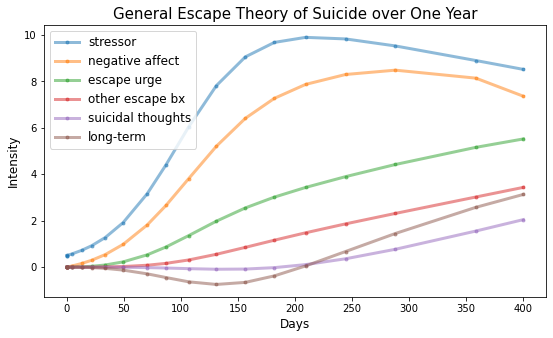

In [509]:
# initial conditions
y_vec = np.array([0.5, 0, 0, 0, 0, 0])

# parameters
a1 = 0.03
a2 = 0.02
b1 = 0.03
b2 = 0.02
c1 = 0.03
c2 = 0.025
d1 = 0.08
e1 = 0.015
k = 10

# integrate
sol_mod1 = solve_ivp(mod1, [0, 400], y_vec, args = (a1, a2, b1, b2, c1, c2, d1, e1, k), method = "Radau")

# plot
plt.figure(figsize=(9, 5))
plt.plot(sol_mod1.t, sol_mod1.y[0, :], '.-', label = 'stressor', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[1, :], '.-', label = 'negative affect', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[2, :], '.-', label = 'escape urge', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[3, :], '.-', label = 'other escape bx', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[4, :], '.-', label = 'suicidal thoughts', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[5, :], '.-', label = 'long-term', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 12)
plt.title('General Escape Theory of Suicide over One Year', fontsize = 15)
plt.ylabel('Intensity', fontsize = 12)
plt.xlabel('Days', fontsize = 12);

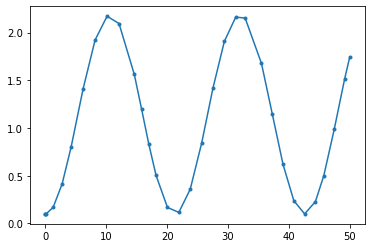

In [522]:
def test(t, y_vec):

    y1 = y_vec[0]
    y2 = y_vec[1]
    
    dy1 = y2
    dy2 = .1 * np.sin(y1 + 2)
    
    return np.array([dy1, dy2])


sol = solve_ivp(test, [0, 50], [0.1, 0], method = "Radau")
plt.plot(sol.t, sol.y[0, :], '.-')

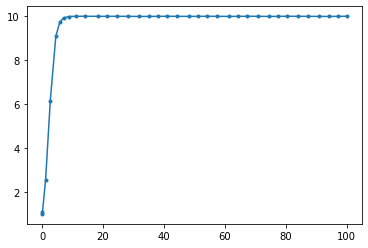

In [348]:
def test(t, y):
     
    dy = y*(1 - y/10)
    
    return(dy)


sol = solve_ivp(test, [0, 100], [1])
plt.plot(sol.t, sol.y[0, :], '.-')